In [1]:
import nltk
nltk.download('punkt')
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
AIV_original = pd.read_csv('Data/Amazon_Instant_Video.csv')
AIV = AIV_original.drop(columns = ['unixReviewTime', 'asin', 'helpful']).copy()
AIV.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reviewerID,reviewerName,reviewText,overall,summary,reviewTime
0,A11N155CW1UV02,AdrianaM,I had big expectations because I love English ...,2.0,A little bit boring for me,"05 3, 2014"
1,A3BC8O2KCL29V2,Carol T,I highly recommend this series. It is a must f...,5.0,Excellent Grown Up TV,"09 3, 2012"
2,A60D5HQFOTSOM,"Daniel Cooper ""dancoopermedia""",This one is a real snoozer. Don't believe anyt...,1.0,Way too boring for me,"10 16, 2013"
3,A1RJPIGRSNX4PW,"J. Kaplan ""JJ""",Mysteries are interesting. The tension betwee...,4.0,Robson Green is mesmerizing,"10 30, 2013"
4,A16XRPF40679KG,Michael Dobey,"This show always is excellent, as far as briti...",5.0,Robson green and great writing,"02 11, 2009"


In [2]:
AIV.isnull().sum()

reviewerID        0
reviewerName    329
reviewText        0
overall           0
summary           0
reviewTime        0
dtype: int64

In [3]:
AIV = AIV[AIV['reviewerName'].notna()]
AIV

,reviewerID,reviewerName,reviewText,overall,summary,reviewTime
0,A11N155CW1UV02,AdrianaM,I had big expectations because I love English ...,2.0,A little bit boring for me,"05 3, 2014"
1,A3BC8O2KCL29V2,Carol T,I highly recommend this series. It is a must f...,5.0,Excellent Grown Up TV,"09 3, 2012"
2,A60D5HQFOTSOM,"Daniel Cooper ""dancoopermedia""",This one is a real snoozer. Don't believe anyt...,1.0,Way too boring for me,"10 16, 2013"
3,A1RJPIGRSNX4PW,"J. Kaplan ""JJ""",Mysteries are interesting. The tension betwee...,4.0,Robson Green is mesmerizing,"10 30, 2013"
4,A16XRPF40679KG,Michael Dobey,"This show always is excellent, as far as briti...",5.0,Robson green and great writing,"02 11, 2009"
...,...,...,...,...,...,...
37121,A1ELO9LMSE1CQ7,Mpr90,I love the books! The show is amazing so far. ...,5.0,Great Series!,"07 19, 2014"
37122,AGOEKVIJV9UX6,Mr. Markster,"""The Strain"" has potential to be an excellent ...",5.0,Forget the Vampire Diaries -- This is a REAL V...,"07 14, 2014"
37123,A3I291BE0RNZCU,Rating My Best Pick,"I'm not real sure on how, I should rate this s...",3.0,It's only the first episode so I'm not real su...,"07 14, 2014"
37124,A1MNITZRYU71IO,"Sherry ""trying in ohio""",episode one so far makes me want to watch more...,4.0,and that is good. The accents are a bit much h...,"07 14, 2014"


In [4]:
AIV.isnull().sum()

reviewerID      0
reviewerName    0
reviewText      0
overall         0
summary         0
reviewTime      0
dtype: int64

No quedan elementos nulos

In [5]:
AIV[AIV.duplicated()]
#No hay elementos duplicados

,reviewerID,reviewerName,reviewText,overall,summary,reviewTime


In [6]:
print('Dimensions before dropping duplicated rows: ' + str(AIV.shape))
AIV = AIV.drop(AIV[AIV.duplicated()].index)
print('Dimensions after dropping duplicated rows: ' + str(AIV.shape))
#No se elimina ningún elemento porque no hay duplicados

Dimensions before dropping duplicated rows: (36797, 6)
Dimensions after dropping duplicated rows: (36797, 6)


In [7]:
AIV['reviewTime'] = pd.to_datetime(AIV['reviewTime'])
AIV['reviewTime']
#Como se ve al final, está en el formato datetime

0       2014-05-03
1       2012-09-03
2       2013-10-16
3       2013-10-30
4       2009-02-11
           ...    
37121   2014-07-19
37122   2014-07-14
37123   2014-07-14
37124   2014-07-14
37125   2014-07-16
Name: reviewTime, Length: 36797, dtype: datetime64[ns]

Punto A:

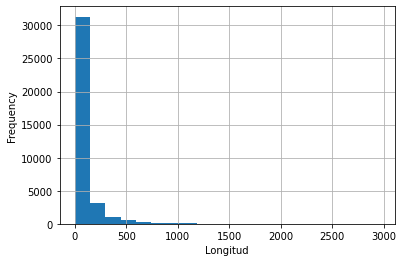

In [8]:
words_per_review = AIV.reviewText.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 20)
plt.xlabel('Longitud')
plt.ylabel('Frequency')
plt.show()

Punto B:

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwordsEng = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
AIV['reviews_text_lowercase'] = AIV['reviewText'].str.lower()
AIV

,reviewerID,reviewerName,reviewText,overall,summary,reviewTime,reviews_text_lowercase
0,A11N155CW1UV02,AdrianaM,I had big expectations because I love English ...,2.0,A little bit boring for me,2014-05-03,i had big expectations because i love english ...
1,A3BC8O2KCL29V2,Carol T,I highly recommend this series. It is a must f...,5.0,Excellent Grown Up TV,2012-09-03,i highly recommend this series. it is a must f...
2,A60D5HQFOTSOM,"Daniel Cooper ""dancoopermedia""",This one is a real snoozer. Don't believe anyt...,1.0,Way too boring for me,2013-10-16,this one is a real snoozer. don't believe anyt...
3,A1RJPIGRSNX4PW,"J. Kaplan ""JJ""",Mysteries are interesting. The tension betwee...,4.0,Robson Green is mesmerizing,2013-10-30,mysteries are interesting. the tension betwee...
4,A16XRPF40679KG,Michael Dobey,"This show always is excellent, as far as briti...",5.0,Robson green and great writing,2009-02-11,"this show always is excellent, as far as briti..."
...,...,...,...,...,...,...,...
37121,A1ELO9LMSE1CQ7,Mpr90,I love the books! The show is amazing so far. ...,5.0,Great Series!,2014-07-19,i love the books! the show is amazing so far. ...
37122,AGOEKVIJV9UX6,Mr. Markster,"""The Strain"" has potential to be an excellent ...",5.0,Forget the Vampire Diaries -- This is a REAL V...,2014-07-14,"""the strain"" has potential to be an excellent ..."
37123,A3I291BE0RNZCU,Rating My Best Pick,"I'm not real sure on how, I should rate this s...",3.0,It's only the first episode so I'm not real su...,2014-07-14,"i'm not real sure on how, i should rate this s..."
37124,A1MNITZRYU71IO,"Sherry ""trying in ohio""",episode one so far makes me want to watch more...,4.0,and that is good. The accents are a bit much h...,2014-07-14,episode one so far makes me want to watch more...


In [15]:
Eliminate = AIV['reviews_text_lowercase'].apply(lambda review: 
[char for char in list(review) if not char.isalnum() and char != ' '])

In [14]:
List = [item for sublist in Eliminate for item in sublist]

In [17]:
AIV['reviews_text_lowercase'] = AIV['reviews_text_lowercase'].str.replace(r'[^A-Za-z0-9 ]+', ' ')
AIV
stopEx = set(stopwordsEng)
noStop = []
newList = []
sentence = ''.join(AIV['reviews_text_lowercase'])
review = nltk.word_tokenize(sentence)

<ipython-input-17-4312ee726d6e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  AIV['reviews_text_lowercase'] = AIV['reviews_text_lowercase'].str.replace(r'[^A-Za-z0-9 ]+', ' ')


In [18]:
for review in review:
    if review in stopEx:
        newList.append(review)
    else:
        noStop.append(review)

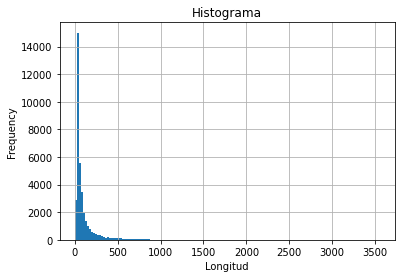

In [19]:
pd.Series(' '.join(noStop).split()).value_counts()
words_per_review = AIV.reviews_text_lowercase.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 150)
plt.xlabel('Longitud')
plt.ylabel('Frequency')
plt.title('Histograma')
plt.show()

Punto C:

In [ ]:
from collections import Counter

all_reviews_text = ' '.join(AIV['reviewText'])
tokenized_words = nltk.word_tokenize(all_reviews_text)
word_freq = Counter(tokenized_words)
word_freq

In [ ]:
from nltk.util import ngrams

def top_k_ngrams(word_tokens,n,k):
    
    n_gram_list = list(ngrams(word_tokens,n))
    
    n_gram_strings = [' '.join(n_gram) for n_gram in n_gram_list]
    
    n_gram_counter = counter(n_gram_strings)
    most_common_k = n_gran_counter.most_common(k)
    print (most_common_k)

Bigrama

In [ ]:
# Definiendo las stop words
stopwords = stopwords.words('english')

# Concatenando los primeras 1000 comentarios
reviews_text = ' '.join(AIV['reviewText'][:1000])

# Tokenización de palabras
word_tokens = nltk.word_tokenize(reviews_text)

# Removiendo las stop words
word_tokens_clean = [word for word in word_tokens if word.lower() not in stopwords and len(word.lower()) > 2]

# Llamando a la función definida arriba
top_k_ngrams(word_tokens_clean, 2, 10)

Trigrama

In [ ]:
# Definiendo las stop words
stopwords = stopwords.words('english')

# Concatenando los primeras 1000 comentarios
reviews_text = ' '.join(AIV['reviewText'][:1000])

# Tokenización de palabras
word_tokens = nltk.word_tokenize(reviews_text)

# Removiendo las stop words
word_tokens_clean = [word for word in word_tokens if word.lower() not in stopwords and len(word.lower()) > 2]

# Llamando a la función definida arriba
top_k_ngrams(word_tokens_clean, 3, 10)

4-grama

In [ ]:
# Definiendo las stop words
stopwords = stopwords.words('english')

# Concatenando los primeras 1000 comentarios
reviews_text = ' '.join(AIV['reviewText'][:1000])

# Tokenización de palabras
word_tokens = nltk.word_tokenize(reviews_text)

# Removiendo las stop words
word_tokens_clean = [word for word in word_tokens if word.lower() not in stopwords and len(word.lower()) > 2]

# Llamando a la función definida arriba
top_k_ngrams(word_tokens_clean, 4, 10)